# Limpeza e EDA dos dados recebidos


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e carregamento dos dados

In [3]:
df = pd.read_csv('../data/vendas_jittered.csv')
df.head()

,Data,Produto,Quantidade,ValorMedio,Total,Func,Ndoc,Tipo,CST,NCM,Codigo,Categoria
0,2015-01-02,OLEO SELENIA SPRINTA 4T 20W-50,1.0,11.70,11.70,4,24039,C,60,27101932,913,OLEO
1,2015-01-02,PNEU TRAS. BIZ LEVORIN DAKA 80/100X14,1.0,109.25,109.25,3,24049,C,60,40114000,829,PNEU
2,2015-01-02,CAMARA AR CG/TITAN LEVORIN (SA 18),1.0,24.61,24.61,4,24039,C,60,40139000,442,CAMARA
3,2015-01-02,CAMARA AR TRAS. BROS/XLR 250 PIRELLI,1.0,37.75,37.75,4,24043,C,60,40139000,1376,CAMARA
4,2015-01-02,CABO EMB. KS/ES 2002/08 FAN IMP/CG-83,1.0,10.39,10.39,3,24037,C,60,84831030,2146,CABO


## Análise

### Início da análise estrutural dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255895 entries, 0 to 255894
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Data        255895 non-null  object 
 1   Produto     255895 non-null  object 
 2   Quantidade  255895 non-null  float64
 3   ValorMedio  255895 non-null  float64
 4   Total       255895 non-null  float64
 5   Func        255895 non-null  int64  
 6   Ndoc        255895 non-null  int64  
 7   Tipo        255895 non-null  object 
 8   CST         255895 non-null  int64  
 9   NCM         255895 non-null  int64  
 10  Codigo      255895 non-null  int64  
 11  Categoria   255895 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 23.4+ MB


In [5]:
df.describe()

,Quantidade,ValorMedio,Total,Func,Ndoc,CST,NCM,Codigo
count,255895.000000,255895.000000,255895.000000,255895.000000,255895.000000,255895.000000,2.558950e+05,255895.000000
mean,1.278110,21.954933,23.406216,3.636097,67053.554774,58.289619,6.895641e+07,3055.969562
std,1.095199,35.574053,38.087845,1.009804,51968.250656,10.749343,2.257513e+07,2518.062502
min,1.000000,0.100000,0.100000,0.000000,1.000000,0.000000,2.710193e+07,1.000000
25%,1.000000,3.890000,4.660000,3.000000,17108.000000,60.000000,4.016930e+07,787.000000
50%,1.000000,11.220000,12.300000,4.000000,60796.000000,60.000000,8.421310e+07,2635.000000
75%,1.000000,22.600000,23.660000,4.000000,111154.500000,60.000000,8.714100e+07,5060.000000
max,178.000000,762.310000,1699.080000,9.000000,166092.000000,260.000000,9.613900e+07,8971.000000


Analisando a coluna quantidade, podemos ver que até o terceiro quartil temos o valor 1, o que indica que grande parte dos itens são vendidos em unidade.
Já o valor Médio, podemos ver que, em média, os valores não são altos.
Com essas duas informações já sabemos, também, que o valor total, em média, não será muito elevado, o que se confirma.


In [6]:
df.describe(include='object')

,Data,Produto,Tipo,Categoria
count,255895,255895,255895,255895
unique,3054,6582,2,223
top,2016-09-02,OLEO SELENIA SPRINTA 4T 20W-50,P,OLEO
freq,286,8937,163009,24361


### Remoção de colunas que não utilizaremos
Não utilizaremos as colunas NCM e CST

In [7]:
df.drop(columns=['CST', 'NCM'], inplace=True)

### Conversão dos dados necessários

Podemos ver que temos que categorizar os Funcinoários (não queremos simular uma hierarquia entre eles), converter Data para datetime e mudar quantidade para valores inteiros, não se vende "valores quebrados" de peças.

In [8]:
df['Func'] = df['Func'].astype('category')
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [9]:
df.head()

,Data,Produto,Quantidade,ValorMedio,Total,Func,Ndoc,Tipo,Codigo,Categoria
0,2015-01-02,OLEO SELENIA SPRINTA 4T 20W-50,1.0,11.70,11.70,4,24039,C,913,OLEO
1,2015-01-02,PNEU TRAS. BIZ LEVORIN DAKA 80/100X14,1.0,109.25,109.25,3,24049,C,829,PNEU
2,2015-01-02,CAMARA AR CG/TITAN LEVORIN (SA 18),1.0,24.61,24.61,4,24039,C,442,CAMARA
3,2015-01-02,CAMARA AR TRAS. BROS/XLR 250 PIRELLI,1.0,37.75,37.75,4,24043,C,1376,CAMARA
4,2015-01-02,CABO EMB. KS/ES 2002/08 FAN IMP/CG-83,1.0,10.39,10.39,3,24037,C,2146,CABO


In [10]:
df['Quantidade'] = df['Quantidade'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255895 entries, 0 to 255894
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Data        255895 non-null  datetime64[ns]
 1   Produto     255895 non-null  object        
 2   Quantidade  255895 non-null  int64         
 3   ValorMedio  255895 non-null  float64       
 4   Total       255895 non-null  float64       
 5   Func        255895 non-null  category      
 6   Ndoc        255895 non-null  int64         
 7   Tipo        255895 non-null  object        
 8   Codigo      255895 non-null  int64         
 9   Categoria   255895 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 17.8+ MB


### Contagem dos valores nulos

In [12]:
df.isna().sum()

Data          0
Produto       0
Quantidade    0
ValorMedio    0
Total         0
Func          0
Ndoc          0
Tipo          0
Codigo        0
Categoria     0
dtype: int64

Não temos valores nulos!

---

### Cardinalidade 

In [13]:
print('-- Cada coluna possui os seguintes valores únicos:')
print("Produtos únicos:", df['Produto'].nunique())
print("Categorias únicas:", df['Categoria'].nunique())
print("Funcionários únicos:", df['Func'].nunique())
print("Nº de vendas (Ndoc):", df['Ndoc'].nunique())

-- Cada coluna possui os seguintes valores únicos:
Produtos únicos: 6582
Categorias únicas: 223
Funcionários únicos: 9
Nº de vendas (Ndoc): 113075


### Análise de Produtos/Categorias
Vamos ver quais produtos e categorias são mais e menos frequentes.
Representando os produtos mais e menos vendidos.

In [14]:
prod_freq = df['Produto'].value_counts()
prod_freq.head(10)

Produto
OLEO SELENIA SPRINTA 4T 20W-50           8937
OLEO DULUB MOTO 4T 20W50 SL              3404
OLEO LUBRAX GP MOTO 4T 20W50             3307
OLEO MOBIL 4T 20 W 50                    2954
ROLAM. 6301 IMP. - DIANT. CG             1978
VISEIRA CAPACETE SAN MARINO CRISTAL 0    1740
LAMP. STOP CG 12V - IMP.                 1624
OLEO MOTO 4T 20W50                       1571
RET. VALVULA BIZ/TIT150/2002/03/04 MA    1530
SERV. CAPA BANCO                         1528
Name: count, dtype: int64

In [15]:
print(prod_freq.tail(10))

Produto
GUARNICAO ESCAP. CB 400 (GR)             1
RET. MESA BIZ PART.(INT.ELETRICA) VED    1
CORRENTE COM. POP-110I 90L WGK           1
MACANETA FREIO POP 110I 2018/22 3165     1
ESTATOR COMPL. BROS 150 09/14 ZOUIL-1    1
KIT EMB. CG-150 WGK                      1
CABO FREIO CG/FAN 150 2014/15/CG160      1
INTERRUP. IGNIC. BIZ-110I 2016/17 C/T    1
PARALAMA DIANT. BIZ 04/05 VERM.          1
VIRABREQUIM CG-150 S/ROLAM.AUDAX         1
Name: count, dtype: int64


4 dos 5 produtos mais vendidos são óleo.

In [16]:
cat_freq = df['Categoria'].value_counts(normalize=True) * 100
print(cat_freq)

Categoria
OLEO           9.519920
RET.           5.379159
PARAF.         5.233787
LAMP.          4.140761
JUNTA          4.127865
                 ...   
GANCHO         0.000391
CORPO          0.000391
LIMITADOR      0.000391
BORRACHA       0.000391
VIRABREQUIM    0.000391
Name: proportion, Length: 223, dtype: float64


Aqui acima temos as categorias que mais vendem em porcentagem.
Possivelmente as de baixa frequência podem ser colocadas junto a outra categoria.

In [17]:
print(cat_freq.head(10))

Categoria
OLEO       9.519920
RET.       5.379159
PARAF.     5.233787
LAMP.      4.140761
JUNTA      4.127865
CABO       3.768342
PORCA      2.801930
KIT        2.655777
ROLAM.     2.499072
ARRUELA    1.950409
Name: proportion, dtype: float64


In [18]:
print(cat_freq.tail(10))

Categoria
X-PNEU         0.000391
LAMPADA        0.000391
DOBRADICA      0.000391
X-PASTILHA     0.000391
SACA           0.000391
GANCHO         0.000391
CORPO          0.000391
LIMITADOR      0.000391
BORRACHA       0.000391
VIRABREQUIM    0.000391
Name: proportion, dtype: float64


Text(0, 0.5, 'Vendas')

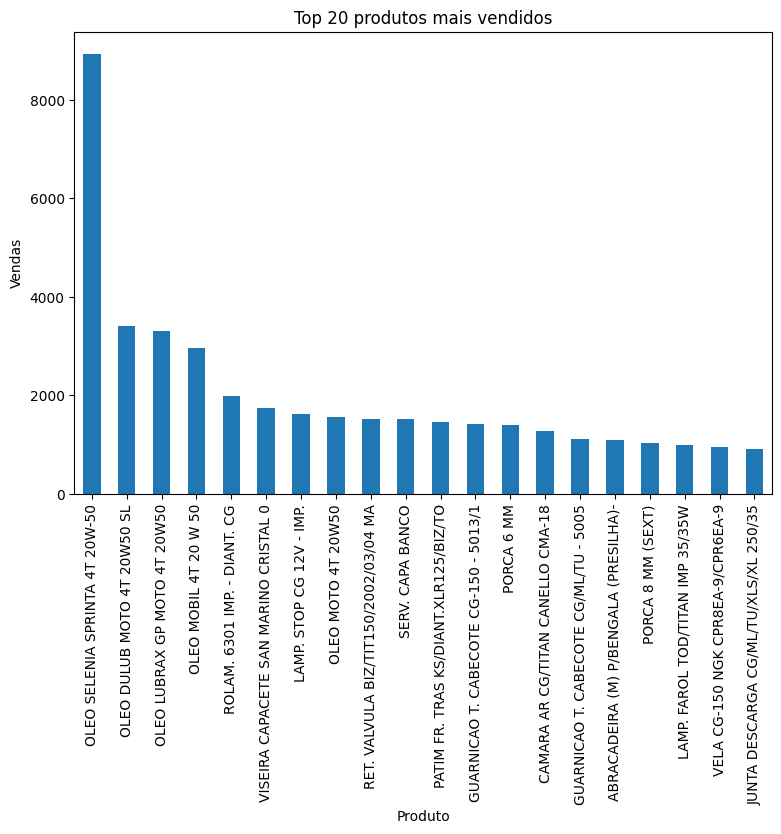

In [19]:
prod_freq[0:20].plot(kind='bar', figsize=(9,6), title='Top 20 produtos mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Vendas')

---

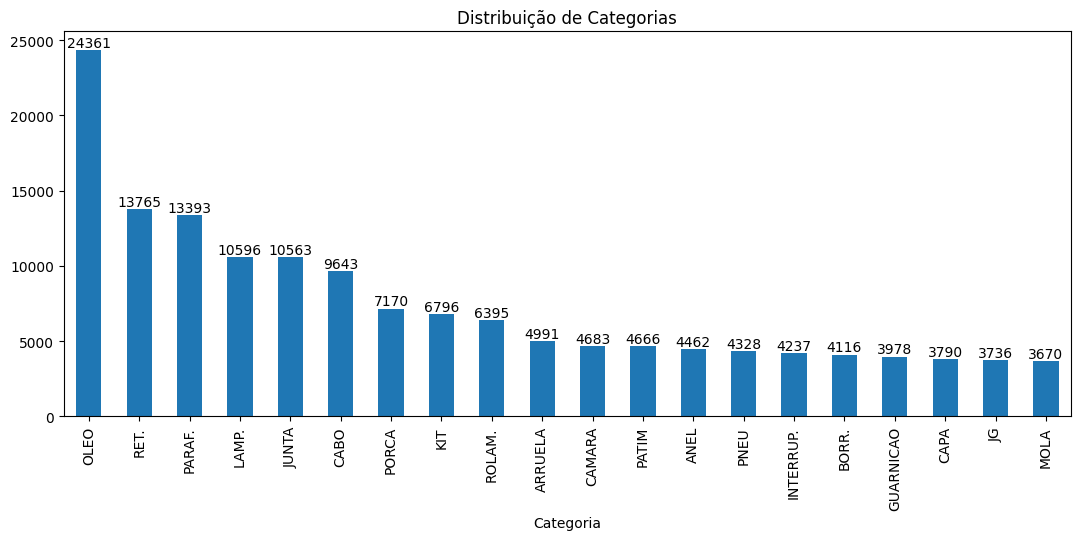

In [20]:
cat_freq_nao_norm = df['Categoria'].value_counts()
ax = cat_freq_nao_norm[0:20].plot(kind='bar', figsize=(13,5), title='Distribuição de Categorias')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

#### Análise rápida da frequência dos funcionários

In [21]:
func_freq = df['Func'].value_counts()
print(func_freq.describe())

count         9.000000
mean      28432.777778
std       49959.140605
min           2.000000
25%         397.000000
50%        3291.000000
75%       12528.000000
max      126912.000000
Name: count, dtype: float64


In [22]:
func_freq

Func
4    126912
3    104451
7     12528
2      7619
1      3291
0       690
8       397
9         5
6         2
Name: count, dtype: int64

A loja tem 2 principais vendedores, com mais de 100mil vendas cada, enquanto o terceiro maior tem apenas 12mil vendas cadastradas. Os outros funcinários podem ter tido pouco tempo de trabalho, ou apenas tem outras funções dentro da loja. <br/>
Vamos ver um **gráfico**:

Text(0, 0.5, 'Número de Vendas')

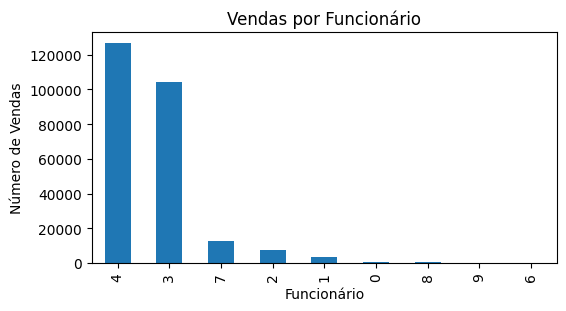

In [23]:
func_freq.plot(kind='bar', figsize=(6,3), title='Vendas por Funcionário')
plt.xlabel('Funcionário')
plt.ylabel('Número de Vendas')

### Análise Univariada das colunas

#### Variáveis Numericas
Temos como variaveis numéricas `Quantidade`, `ValorMedio`, `Total`. Então vamos analisar separadamente cada uma para entender suas distribuições, valores extremos, assimetrias e sazonalidade.

##### Quantidade
